[View in Colaboratory](https://colab.research.google.com/github/aksh98/FintechProject/blob/master/NowCasting_StateLevel.ipynb)

### Extra Code - Might be useful

In [0]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# creds = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)




In [0]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# !mkdir -p drive
# !google-drive-ocamlfuse drive  
  

## Start execution from here 


In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
# # !pip install -U -q PyDrive
# from google.colab import files
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !ls
# !cd datalab


In [4]:
%cd drive/My Drive/Colab Notebooks
%cd FintechProject
!ls

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/FintechProject
 2d_4_17.csv				   OES_Fintech.ipynb
 2dout.csv				   output.xlsx
 3d_4_17.csv				   outt.xlsx
 DataExtraction_GoogleTrends_basic.ipynb   predicted.xlsx
 Fintech_16may.ipynb			  'Task Statements (1).txt'
'Fintech Project Proposal.docx'		   TrendsData.ipynb
 GoogleTrendsData.csv			   trends_state_4.csv
 googletrends_state.csv			   trends_state_4.xlsx
 NowCasting_StateLevel.ipynb		   umichigan_allsentiment_clean.csv
 OES_2_00_17				   Web_Scraper.ipynb
 OES_3_00_17


## Preprocessing of National Level data 

In [5]:
datafile = pd.read_csv('GoogleTrendsData.csv')
datafile.shape

(176, 8)

In [6]:
# datafile.shape[0]
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX
171,2018-04,74,18,1,4,13,68,127.0
172,2018-05,71,16,1,4,9,68,134.0
173,2018-06,71,17,1,3,9,71,132.0
174,2018-07,71,18,1,5,9,71,NaN
175,2018-08,85,16,1,5,11,81,NaN


In [0]:
# print(datafile['UMEX'].max())
# print(datafile['UMEX'].min())

datafile.drop(datafile.tail(2).index,inplace=True)

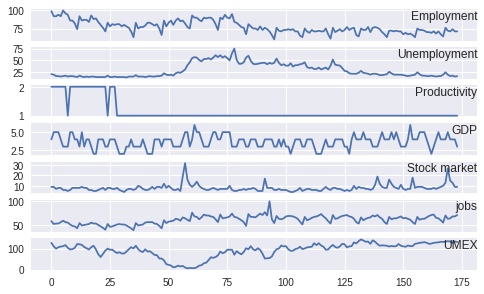

In [8]:
from matplotlib import pyplot
from pandas import concat


pyplot.figure()

for i in range(1,8):
  pyplot.subplot(8,1,i+1)
  pyplot.plot(datafile.values[:,i])
  pyplot.title(datafile.columns[i],y=0.5,loc='right')

pyplot.show()  

In [9]:
columns = ['Month',	'Employment',	'Unemployment',	'Productivity',	'GDP',	'Stock market',	'jobs','UMEX']
datafile.drop(['Month','Employment','Stock market'],inplace = True, axis=1)
datafile.tail()

,Unemployment,Productivity,GDP,jobs,UMEX
169,20,1,5,63,136.0
170,17,1,4,64,134.0
171,18,1,4,68,127.0
172,16,1,4,68,134.0
173,17,1,3,71,132.0


In [10]:
Y = datafile['UMEX']
# X = datafile[['Employment','Unemployment','Productivity','GDP','Stock market','jobs']]
X = datafile[['Unemployment','Productivity','GDP','jobs']]

X.head()
print(X.shape, Y.shape)


(174, 4) (174,)


## Preprocessing of state level Data

In [21]:
# Data size - 51(states) x 697 observations        697 = 174*4+1()
datafie = pd.read_csv('trends_state_4.csv')
datafie.shape
states = datafie.iloc[:,0]
datafie.drop(datafie.columns[0],inplace = True, axis=1)
print(datafie.shape)
datafie.head()
# for i in range(0,datafile.shape[1]):
#   for j in range(datafile.shape[0]):


(51, 696)


,Unemployment,Productivity,GDP,Jobs,Unemployment.1,Productivity.1,GDP.1,Jobs.1,Unemployment.2,Productivity.2,...,GDP.171,Jobs.171,Unemployment.172,Productivity.172,GDP.172,Jobs.172,Unemployment.173,Productivity.173,GDP.173,Jobs.173
0,5,2,1,92,5,1,4,90,5,2,...,1,92,7,0,0,93,7,0,0,93
1,4,0,2,94,5,0,0,95,2,2,...,1,93,7,0,0,93,6,0,1,93
2,6,1,2,91,8,1,2,89,7,0,...,1,93,5,0,1,94,5,0,0,95
3,9,0,2,89,6,0,0,94,2,0,...,1,94,4,0,1,95,4,0,0,96
4,9,0,1,90,8,1,2,89,7,1,...,2,93,5,0,2,93,5,0,1,94


In [22]:
print(states)


0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [23]:
matrix = datafie.as_matrix()
matrix.shape
matrix = np.reshape(matrix,(51*174,4))
print(np.reshape(matrix,(51*174,4)))
print(matrix.shape)

[[ 5  2  1 92]
 [ 5  1  4 90]
 [ 5  2  0 93]
 ...
 [ 4  0  1 95]
 [ 5  0  0 95]
 [ 5  0  0 95]]
(8874, 4)


In [24]:
mat = pd.DataFrame(matrix, columns = ['Employment','Unemployment','GDP','Jobs'])
# mat = 
print(mat.head())
print(mat.shape)

   Employment  Unemployment  GDP  Jobs
0           5             2    1    92
1           5             1    4    90
2           5             2    0    93
3           7             1    1    91
4           5             0    2    93
(8874, 4)


----
----

# **Training Models**
---

## Training & Testing on National Level Data 

** 1. Training (X_train,Y_train) -> National Level Data = 100 x 4 , 100 x 1 **

** 2. Testing (X_test,Y_test) -> National Level data  =  73 x 4 , 73 x 1 **


In [0]:
#====================================================
##          Long Short Term Memory Data Preparation
#====================================================

# source: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

from sklearn.preprocessing import MinMaxScaler


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
values = datafile.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
# print(scaled)
reframed = series_to_supervised(scaled, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

In [68]:
values = reframed.values
train = values[:100,:]
test = values[100:,:]
train_x,train_y = train[:,:-1],train[:,-1]
test_x,test_y = test[:,:-1],test[:,-1]

train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)

(73, 1, 5) (73,) (100, 1, 5) (100,)


(73, 1, 5) (73,) (100, 1, 5) (100,)
Train on 100 samples, validate on 73 samples
Epoch 1/200
 - 1s - loss: 0.2598 - val_loss: 0.1302
Epoch 2/200
 - 0s - loss: 0.2386 - val_loss: 0.1190
Epoch 3/200
 - 0s - loss: 0.2281 - val_loss: 0.1184
Epoch 4/200
 - 0s - loss: 0.2157 - val_loss: 0.1196
Epoch 5/200
 - 0s - loss: 0.2015 - val_loss: 0.1209
Epoch 6/200
 - 0s - loss: 0.1860 - val_loss: 0.1240
Epoch 7/200
 - 0s - loss: 0.1702 - val_loss: 0.1280
Epoch 8/200
 - 0s - loss: 0.1539 - val_loss: 0.1346
Epoch 9/200
 - 0s - loss: 0.1371 - val_loss: 0.1441
Epoch 10/200
 - 0s - loss: 0.1215 - val_loss: 0.1581
Epoch 11/200
 - 0s - loss: 0.1084 - val_loss: 0.1780
Epoch 12/200
 - 0s - loss: 0.1016 - val_loss: 0.1859
Epoch 13/200
 - 0s - loss: 0.0991 - val_loss: 0.1825
Epoch 14/200
 - 0s - loss: 0.0978 - val_loss: 0.1746
Epoch 15/200
 - 0s - loss: 0.0958 - val_loss: 0.1661
Epoch 16/200
 - 0s - loss: 0.0934 - val_loss: 0.1590
Epoch 17/200
 - 0s - loss: 0.0911 - val_loss: 0.1489
Epoch 18/200
 - 0s - loss: 

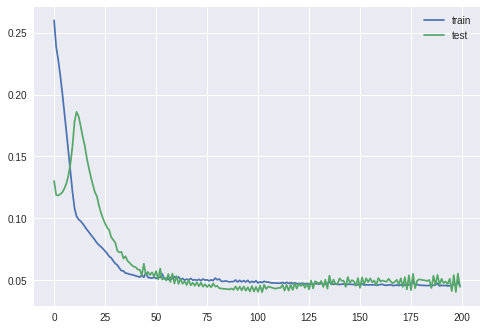

(73, 1, 5)
Test RMSE : 3.624


In [52]:
#====================================================
##          Long Short Term Memory
#====================================================

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#--------------------------
values = reframed.values
train = values[:100,:]
test = values[100:,:]
train_x,train_y = train[:,:-1],train[:,-1]
test_x,test_y = test[:,:-1],test[:,-1]

train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)
#====================================================
##          Long Short Term Memory MODEL       ----
#====================================================

model = Sequential()
model.add(LSTM(200, input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')
# fit network
history = model.fit(train_x,train_y,epochs=200,batch_size=16, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# plot
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

#====================================================
##          Long Short Term Memory Prediction
#====================================================
from sklearn.metrics import mean_squared_error
from numpy import concatenate
from math import sqrt

print(test_x.shape)

yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_x[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE : %.3f' % rmse)
print("")
#====================================================
##          LSTM Model End
#====================================================


## Training on National Level and testing on state level
** 1. Training (X,Y) -> National Level Data = 173 x 4 , 173 x 1 **

** 2. Testing (mat) -> State Level data  =  8874 x 4 **



In [30]:
#====================================================
##          Long Short Term Memory Data Preparation
#====================================================

# source: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

from sklearn.preprocessing import MinMaxScaler


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# changed datafile to X
values = X.values
val = mat.values
# ensure all data is float
values = values.astype('float32')
val = val.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scald = scaler.fit_transform(val)
print("-- ",val.shape,values.shape,scald.shape,scaled.shape)
# frame as supervised learning
# print(scaled)
reframed = series_to_supervised(scaled, 1)
reframd = series_to_supervised(scald, 1)
print(reframed.shape,reframd.shape)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
reframd.drop(reframd.columns[[5,6,7]],axis=1,inplace=True)
# reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())
print(reframd.head())

print(reframed.shape,reframd.shape,X.shape,Y.shape)


--  (8874, 4) (174, 4) (8874, 4) (174, 4)
(173, 8) (8873, 8)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.114754        1.0       0.50   0.311475  0.098361
2   0.098361        1.0       0.75   0.213115  0.049180
3   0.049180        1.0       0.75   0.229508  0.049180
4   0.049180        1.0       0.75   0.229508  0.032787
5   0.032787        1.0       0.50   0.278689  0.049180
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.131579        0.2   0.090909   0.794872  0.131579
2   0.131579        0.1   0.363636   0.743590  0.131579
3   0.131579        0.2   0.000000   0.820513  0.184211
4   0.184211        0.1   0.090909   0.769231  0.131579
5   0.131579        0.0   0.181818   0.820513  0.105263
(173, 5) (8873, 5) (174, 4) (174,)


In [26]:
!pip install openpyxl


    100% |████████████████████████████████| 2.0MB 9.4MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/3f/37/28/5ab3dffb7ff261e6fa21455ec9d157f95958e818c6b89f024c
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /root/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [31]:
values = reframed.values
val = reframd.values
# (174, 4) (174,)
train = values[:,:]
test = val[:,:]
train_x,train_y = train,Y[1:]
test_x = test

train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

print("Test_x = ",test_x.shape," \nTrain_x = ", train_x.shape,"\nTrain_y = ", train_y.shape)

# (73, 1, 5) (73,) (100, 1, 5) (100,)

Test_x =  (8873, 1, 5)  
Train_x =  (173, 1, 5) 
Train_y =  (173,)


In [0]:
#====================================================
##          Long Short Term Memory
#====================================================

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#====================================================
##          Long Short Term Memory MODEL       ----
#====================================================

model = Sequential()
model.add(LSTM(1000, input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
# fit network
history = model.fit(train_x,train_y,epochs=1000,batch_size=16, verbose=2, shuffle=False)

# plot
pyplot.plot(history.history['loss'],label='train')
# pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

#====================================================
##          Long Short Term Memory Prediction
#====================================================
from sklearn.metrics import mean_squared_error
from numpy import concatenate
from math import sqrt

print( "test_x = ", test_x.shape)

yhat = model.predict(test_x)
print("Predicted_y shape = ",yhat.shape)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
print("Predicted_y shape = ",yhat.shape,test_x.shape)
inv_yhat = concatenate((yhat, test_x[:, 1:]), axis=1)
print("Predicted shape1 = ",inv_yhat.shape)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# print("Predicted shape2 = ",inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# print("Predicted shape3 = ",inv_yhat.shape)
yhat = pd.DataFrame(yhat)
writer = pd.ExcelWriter('predicted.xlsx')
yhat.to_excel(writer,'sheet1',index=True)
writer.save()  

# invert scaling for actual

# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]

# calculate RMSE

# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE : %.3f' % rmse)

#====================================================
##          LSTM Model End
#====================================================


In [0]:
from google.colab import files
files.download('predicted.xlsx') 



# Create Xlsx output file 

In [0]:
## ---------- SEPERATE CODE ----------

t = pd.read_csv('GoogleTrendsData.csv')
t = t.iloc[:,0]
t.drop(t.tail(2).index,inplace=True)
print(t)

In [67]:
print(states)

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [70]:
## ----- To be run at last !! --------
print(t.shape,states.shape)
final = pd.DataFrame(columns=['State','Mon-Year']) 
print(final.shape)
for ind,st in states.iteritems():
  for index,times in t.iteritems():
    final = final.append({'State': st,'Mon-Year': times},ignore_index=True)
#     final.append({'Mon-Yr': t.iloc[times], 'State': state.iloc[st]},ignore_index=True) 
#     final.iloc[st+times][0] = 1 #state.iloc[st]
#     final.iloc[st+times][1] = t.iloc[times]
print(final.shape)
## ------------------------------------    

(174,) (51,)
(0, 2)
(8874, 2)


In [71]:
final.head()

,State,Mon-Year
0,Alabama,2004-01
1,Alabama,2004-02
2,Alabama,2004-03
3,Alabama,2004-04
4,Alabama,2004-05


In [80]:
pre = pd.read_csv('predicted.csv')
outp = pd.concat([final,pre], axis=1)

print(outp.shape)

outp.drop(outp.columns[2],inplace = True, axis=1)
outp.head()
print(outp.columns)
outp.rename(columns={'0':'Predicted Value'})

(8874, 4)
Index(['State', 'Mon-Year', '0'], dtype='object')


,State,Mon-Year,Predicted Value
0,Alabama,2004-01,123.107330
1,Alabama,2004-02,122.711288
2,Alabama,2004-03,120.902618
3,Alabama,2004-04,120.615295
4,Alabama,2004-05,126.685089
5,Alabama,2004-06,131.262955
6,Alabama,2004-07,135.224121
7,Alabama,2004-08,130.389679
8,Alabama,2004-09,125.020035
9,Alabama,2004-10,121.931549


In [0]:
writr = pd.ExcelWriter('final_predicted.xlsx')
outp.to_excel(writr,'sheet1',index=True)
writr.save()

from google.colab import files
files.download('final_predicted.xlsx') 


# TODO
Try building a sequential model 
- https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

# Previous Models ---------------------------------------------------------------

DONT Run This Code


In [69]:
values = reframed.values
train = values[:100,:]
test = values[100:,:]
train_x,train_y = train[:,:-1],train[:,-1]
test_x,test_y = test[:,:-1],test[:,-1]

train_x = train_x.reshape((train_x.shape[0],train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],test_x.shape[1]))

print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)

(73, 7) (73,) (100, 7) (100,)


test_Data  - predicted  - improved
0.35000002  ->  0.36   - 0.41
0.32500005  ->  0.36   - 0.41
0.35000002  ->  0.36   - 0.41
0.27499998  ->  0.36   - 0.42
0.27499998  ->  0.36   - 0.23
0.125  ->  0.36   - 0.23
0.07500005  ->  0.46   - 0.23
0.375  ->  0.46   - 0.46
0.27499998  ->  0.36   - 0.41
0.22500002  ->  0.36   - 0.22
0.32500005  ->  0.36   - 0.20
0.27499998  ->  0.36   - 0.33
0.27499998  ->  0.36   - 0.42
0.30000007  ->  0.36   - 0.40
0.27499998  ->  0.36   - 0.46
0.27499998  ->  0.36   - 0.40
0.375  ->  0.36   - 0.38
0.17500007  ->  0.36   - 0.29
0.024999976  ->  0.46   - 0.43
0.39999998  ->  0.46   - 0.44
0.25  ->  0.36   - 0.39
0.30000007  ->  0.36   - 0.21
0.35000002  ->  0.36   - 0.30
0.27499998  ->  0.36   - 0.32
0.32500005  ->  0.36   - 0.25
0.42500007  ->  0.36   - 0.47
0.32500005  ->  0.36   - 0.41
0.375  ->  0.36   - 0.42
0.39999998  ->  0.36   - 0.33
0.14999998  ->  0.36   - 0.37
0.100000024  ->  0.46   - 0.23
0.375  ->  0.46   - 0.23
0.32500005  ->  0.36   - 0.34
0.32

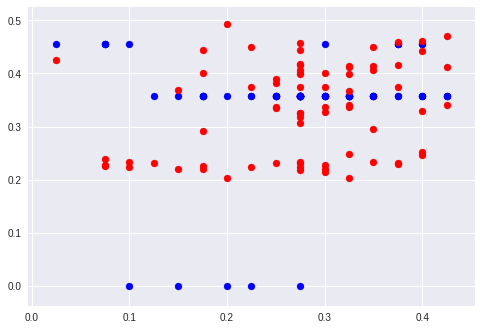

In [70]:
#====================================================
##          Regression Models
#====================================================

rng = np.random.RandomState(1)

# reg = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
# regr_2 = AdaBoostRegressor(SVR(kernel= 'rbf', C= 1e3, gamma= 0.1),
#                           n_estimators=300, random_state=rng)
reg = DecisionTreeRegressor(max_depth=3)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                          n_estimators=300, random_state=rng)

# reg = LinearRegression()
# reg = SVR(kernel='rbf',)
reg.fit(train_x,train_y)
regr_2.fit(train_x,train_y)

arr = reg.predict(test_x)
arr2 = regr_2.predict(test_x)


# print(reg.coef_)
# print(reg.intercept_)


# tsne = TSNE(n_components=2).fit_transform(X)
# print("tsne shape - ",tsne.shape)
# plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
# plt.title('Testing Data')
# plt.xticks(())
# plt.yticks(())
# plt.plot(test,reg.predict(test_x),color = 'red',linewidth=3)
# plt.show()


test = np.asarray(test_y) # to print


print("test_Data"," - predicted"," - improved")

for i in range(0,len(test_y)):
  print(test[i]," ->  %.2f"%arr[i],"  - %.2f"%arr2[i])

plt.scatter(test,arr,color='blue')
plt.scatter(test,arr2,color='red')
plt.show()

test_Data - predicted - improved
0.35000002  ->  0.35   - 0.27
0.32500005  ->  0.39   - 0.37
0.35000002  ->  0.43   - 0.43
0.27499998  ->  0.43   - 0.42
0.27499998  ->  0.27   - 0.25
0.125  ->  0.24   - 0.19
0.07500005  ->  0.01   - -0.08
0.375  ->  0.41   - 0.49
0.27499998  ->  0.35   - 0.33
0.22500002  ->  0.22   - 0.12
0.32500005  ->  0.20   - 0.05
0.27499998  ->  0.35   - 0.26
0.27499998  ->  0.40   - 0.21
0.30000007  ->  0.40   - 0.17
0.27499998  ->  0.39   - 0.18
0.27499998  ->  0.41   - 0.21
0.375  ->  0.34   - 0.19
0.17500007  ->  0.30   - 0.20
0.024999976  ->  0.33   - 0.18
0.39999998  ->  0.31   - 0.23
0.25  ->  0.30   - 0.22
0.30000007  ->  0.16   - 0.05
0.35000002  ->  0.24   - 0.17
0.27499998  ->  0.34   - 0.27
0.32500005  ->  0.37   - 0.24
0.42500007  ->  0.51   - 0.33
0.32500005  ->  0.54   - 0.46
0.375  ->  0.52   - 0.30
0.39999998  ->  0.60   - 0.47
0.14999998  ->  0.59   - 0.45
0.100000024  ->  0.25   - -0.02
0.375  ->  0.11   - -0.17
0.32500005  ->  0.58   - 0.45
0.3

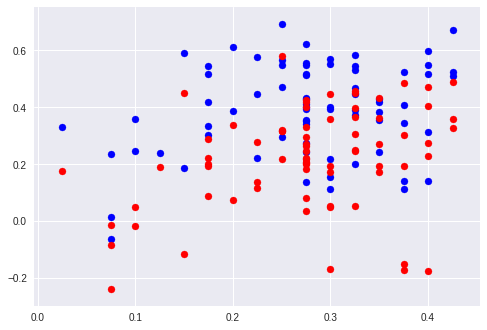

In [71]:
#====================================================
##          Regression Models
#====================================================

rng = np.random.RandomState(1)

reg = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
regr_2 = AdaBoostRegressor(SVR(kernel= 'rbf', C= 1e3, gamma= 0.1),
                          n_estimators=300, random_state=rng)

# reg = LinearRegression()
# reg = SVR(kernel='rbf',)
reg.fit(train_x,train_y)
regr_2.fit(train_x,train_y)

arr = reg.predict(test_x)
arr2 = regr_2.predict(test_x)


# print(reg.coef_)
# print(reg.intercept_)


# tsne = TSNE(n_components=2).fit_transform(X)
# print("tsne shape - ",tsne.shape)
# plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
# plt.title('Testing Data')
# plt.xticks(())
# plt.yticks(())
# plt.plot(test,reg.predict(test_x),color = 'red',linewidth=3)
# plt.show()


test = np.asarray(test_y) # to print


print("test_Data","- predicted","- improved")

for i in range(0,len(test_y)):
  
  #       Test data   ->   Predicted  ->  Improved
  
  print(test[i]," ->  %.2f"%arr[i],"  - %.2f"%arr2[i])

plt.scatter(test,arr,color='blue')
plt.scatter(test,arr2,color='red')
plt.show()

[ 0.59332981  0.17312168  0.11321871 -0.07587026 -0.09662714 -0.28033725
 -0.15072859]
0.3476646481679973
tsne shape -  (174, 2)


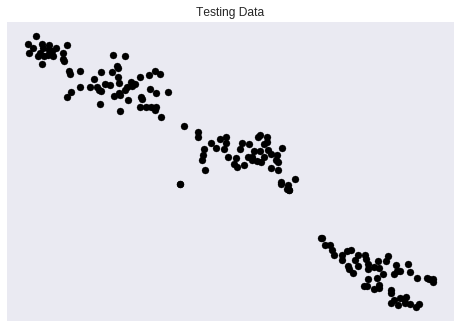

0.35000002  -> 0.34
0.32500005  -> 0.37
0.35000002  -> 0.40
0.27499998  -> 0.38
0.27499998  -> 0.32
0.125  -> 0.33
0.07500005  -> 0.25
0.375  -> 0.30
0.27499998  -> 0.40
0.22500002  -> 0.32
0.32500005  -> 0.27
0.27499998  -> 0.32
0.27499998  -> 0.28
0.30000007  -> 0.30
0.27499998  -> 0.31
0.27499998  -> 0.28
0.375  -> 0.29
0.17500007  -> 0.36
0.024999976  -> 0.28
0.39999998  -> 0.23
0.25  -> 0.39
0.30000007  -> 0.30
0.35000002  -> 0.33
0.27499998  -> 0.33
0.32500005  -> 0.26
0.42500007  -> 0.29
0.32500005  -> 0.35
0.375  -> 0.31
0.39999998  -> 0.30
0.14999998  -> 0.28
0.100000024  -> 0.20
0.375  -> 0.17
0.32500005  -> 0.28
0.32500005  -> 0.26
0.42500007  -> 0.27
0.25  -> 0.31
0.39999998  -> 0.22
0.42500007  -> 0.29
0.39999998  -> 0.31
0.35000002  -> 0.26
0.25  -> 0.26
0.17500007  -> 0.21
0.07500005  -> 0.22
0.30000007  -> 0.18
0.30000007  -> 0.24
0.27499998  -> 0.24
0.30000007  -> 0.24
0.27499998  -> 0.24
0.27499998  -> 0.23
0.17500007  -> 0.23
0.22500002  -> 0.21
0.17500007  -> 0.23
0

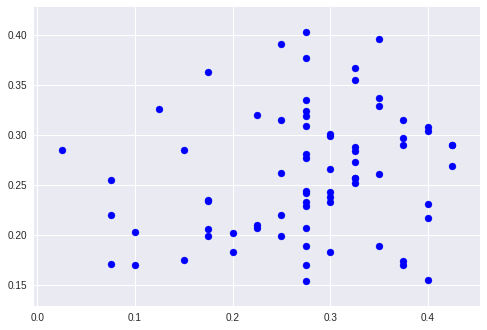

In [72]:
#====================================================
##          Bayesian Ridge Model
#====================================================

regr = linear_model.BayesianRidge()
regr.fit(train_x,train_y)
print(regr.coef_)
print(regr.intercept_)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
# plt.plot(Y_test,reg.predict(X_test),color = 'red',linewidth=3)
plt.show()

test = np.asarray(test_y)
arr = regr.predict(test_x)
for i in range(0,len(test_y)):
  print(test[i]," -> %.2f"%arr[i])
  
plt.scatter(test,arr,color='blue')
plt.show()

(174, 6)
tsne shape -  (174, 2)


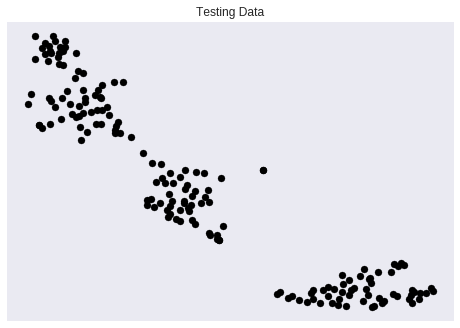

In [73]:
#====================================================
##          Component Reduction
#====================================================

# X.head()
print(X.shape)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
plt.show()


In [0]:
# TO-DO

# - LSTM
# - GRU
